You can use the formula below to calculate the coordinates of the unknown point given the bearing and distance from a known point 1:

la2 = asin(sin(la1)*cos(d/R) + cos(la1)*sin(d/R)*cos(θ))

lo2 = lo1 + atan2(sin(θ)*sin(d/R)*cos(la1), cos(d/R)−sin(la1)*sin(la2))

Where:

la1 is the latitude of the known point in radians.
lo1 is the longitude of the known point in radians.
d is the distance between the two points in km.
R is the radius of the Earth in km (mean radius = 6,371km).
θ is the bearing in radians (clockwise from north).

In [1]:
import numpy as np

# Toronto
latT = 43.67973
lonT = -79.62273
# Agadir
latA = 30.42775
lonA = -9.59811
#Toronto to Agadir
dist = 6212043.0 #meters
Azimuth = 78.64 # degrees

Edist = dist / 1000 / 6371 # distance in earth radii
Azimuthr = Azimuth * np.pi / 180 # Azimuth in radians

latAr = latA * np.pi / 180 
lonAr = lonA * np.pi / 180

lat1 = np.arcsin(np.sin(latAr) * np.cos(Edist) + np.cos(latAr) * np.sin(Edist) * np.cos(Azimuthr)) 
latTc = lat1 *180/np.pi
latTc
#latTc =  asin(sin(lat2) * cos(d/R) - cos(lat2) * sin(d/R) * cos(θ)) 

25.13598161842719

In [ ]:
from geopy.distance import geodesic
newport_ri = (43.67973, -79.62273)
cleveland_oh = (30.42775, -9.59811)
print(geodesic(newport_ri, cleveland_oh))

https://pyproj4.github.io/pyproj/stable/api/geod.html#pyproj.Geod.__init__

In [ ]:
import pyproj
geodesic = pyproj.Geod(ellps='WGS84')
fwd_azimuth,back_azimuth,distance = geodesic.inv(-79.62273,43.67973, -9.59811, 30.42775)
print(fwd_azimuth,back_azimuth,distance)

In [ ]:
endlon, endlat, backaz = geodesic.fwd(-79.62273,43.67973, fwd_azimuth, distance)
print(endlon, endlat, backaz)

https://theskylive.com/where-is-mercury

https://theskylive.com/planetarium#ra|7.879033694754804|dec|-7.5753095002191815|fov|68

In [1]:
import pyproj 

geodesic = pyproj.Geod(ellps='WGS84')
P1az = 70.9
alt1 = 60.2 
P2lat = 20.59368
P2lon = 78.96287
P2az = P1az + 180
endlon, endlat, backaz = geodesic.fwd(P2lon,P2lat,P2az,dist) 
print(endlon, endlat, backaz)
for i in range(1, 200):
    P2az = P1az - backaz + P2az
    endlon, endlat, backaz = geodesic.fwd(P2lon,P2lat,P2az,dist)
    if backaz < 0: backaz = backaz + 360
print(endlon, endlat, backaz)

NameError: name 'dist' is not defined

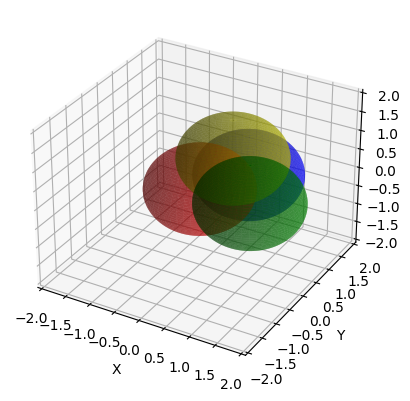

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_sphere(center, radius, num_points=100):
    theta = np.linspace(0, 2 * np.pi, num_points)
    phi = np.linspace(0, np.pi, num_points)
    theta, phi = np.meshgrid(theta, phi)

    x = center[0] + radius * np.sin(phi) * np.cos(theta)
    y = center[1] + radius * np.sin(phi) * np.sin(theta)
    z = center[2] + radius * np.cos(phi)

    return x, y, z

# Sphere 1
center1 = (0, 0, 0)
radius1 = 1.0
x1, y1, z1 = generate_sphere(center1, radius1)

# Sphere 2
center2 = (1, 0, 0)
radius2 = 1.0
x2, y2, z2 = generate_sphere(center2, radius2)

# Sphere 3
center3 = (0.5, 0.866, 0)
radius3 = 1.0
x3, y3, z3 = generate_sphere(center3, radius3)

# Sphere 4
center4 = (0.5, 0.288, 0.816)
radius4 = 1.0
x4, y4, z4 = generate_sphere(center4, radius4)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the spheres
ax.plot_surface(x1, y1, z1, color='r', alpha=0.5)
ax.plot_surface(x2, y2, z2, color='g', alpha=0.5)
ax.plot_surface(x3, y3, z3, color='b', alpha=0.5)
ax.plot_surface(x4, y4, z4, color='y', alpha=0.5)

# Set plot limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


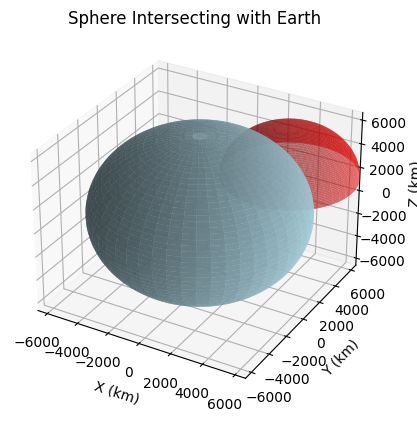

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_sphere_intersecting_earth(center, radius):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the Earth's surface as a sphere
    earth_radius = 6371.0  # Approximate Earth's radius in km
    phi = np.linspace(0, 2 * np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)
    x_earth = earth_radius * np.sin(theta) * np.cos(phi)
    y_earth = earth_radius * np.sin(theta) * np.sin(phi)
    z_earth = earth_radius * np.cos(theta)
    ax.plot_surface(x_earth, y_earth, z_earth, color='lightblue', alpha=0.8)

    # Plot the sphere intersecting the Earth
    phi = np.linspace(0, 2 * np.pi, 100)
    theta = np.linspace(0, np.pi/2, 100)
    phi, theta = np.meshgrid(phi, theta)
    x_sphere = center[0] + radius * np.sin(theta) * np.cos(phi)
    y_sphere = center[1] + radius * np.sin(theta) * np.sin(phi)
    z_sphere = center[2] + radius * np.cos(theta)
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.6)

    # Set plot limits and labels
    ax.set_xlim(-earth_radius, earth_radius)
    ax.set_ylim(-earth_radius, earth_radius)
    ax.set_zlim(-earth_radius, earth_radius)
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')

    # Set plot title
    plt.title('Sphere Intersecting with Earth')

    # Show the plot
    plt.show()

# Sphere center (x, y, z) in km (customize as desired)
sphere_center = (3000, 5000, 1000)
sphere_radius = 4000  # Sphere radius in km (customize as desired)

plot_sphere_intersecting_earth(sphere_center, sphere_radius)


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

def display_earth_orthographically():
  """Displays the earth orthographically."""
  projection = ccrs.Orthographic(central_latitude=0, central_longitude=0)
  ax = plt.axes(projection=projection)
  ax.coastlines()
  ax.gridlines()
  plt.show()

if __name__ == '__main__':
  display_earth_orthographically()


ModuleNotFoundError: No module named 'cartopy'